# Linear algebra exercises 1

*Note: for matrix multiplication, use* `%*%` *instead of* `*`.

In a California redwood forest, the spotted owl is the primary predator of the wood rat. Suppose that the following system models the interaction between owls and rats. Here, $o(t)$ represents the owl population at time $t$ and $r(t)$ represents the rat population at time $t$:

$$
\begin{cases} o(t+1) = 0.5\,o(t) + 0.3\,r(t) \\ 
r(t+1) = -0.2\,o(t) + 1.2\,r(t) \end{cases}
$$

In [109]:
# Libraries
library(dplyr)
library(ggplot2)

## Question 1

Let $\vec{x}(t) = \begin{bmatrix} o(t) \\ r(t) \end{bmatrix}$.

### Part a:

Find a matrix $A$ such that the above system can be written into the matrix form.

$$
\vec{x}(t+1) = A \vec{x}(t)
$$

In [2]:
# Answer

## Question 2

Suppose there are currently 2000 owls and 1000 rats.

### Part a:

How many owls and rats are there next year?

$$
\begin{cases} o(t+1) = 0.5\,o(t) + 0.3\,r(t) \\ 
r(t+1) = -0.2\,o(t) + 1.2\,r(t) \end{cases}
$$

Solving the formula $ Au = v $

Where $ A = $ coefficients, $ u = $ variables, and $ v = $ constants.

In [151]:
# Create population model
population_model <- function(n_years, owls_initial, rats_initial) {
  # Assign starting values to population totals
  n_owls <- owls_initial
  n_rats <- rats_initial

  # Initialize variables
  vars <- matrix(c(owls_initial, rats_initial), nrow=2)

  # Initialize coefficients
  cf <- matrix(
    c(0.5, -0.2, 0.3, 1.2), nrow=2,
    dimnames=list(c("ot+1", "rt+1"), c("ot", "rt"))
  )

  # Create a dataframe to store the populations by year in
  data <- data.frame(matrix(ncol=3, nrow=n_years))
  colnames(data) <- c("Years", "Owls", "Rats")

  for (i in 1:n_years) {
    # Solve for the predicted constants
    predicted <- cf %*% vars
    
    # Update the variables and append them to the dataframe
    vars <- predicted
    data[i,] <- c(i, vars)
  }
  
  return(data)
}

# Run function and return data
n_years <- 1
data <- population_model(n_years, 2000, 1000)
print(data[n_years,])

  Years Owls Rats
1     1 1300  800


## Question 2

### Part b:

How many owls and rats are there the year after next year?

In [ ]:
# Run function and return data
n_years <- 2
data <- population_model(n_years, 2000, 1000)
print(data[n_years,])

  Years Owls Rats
2     2  890  700


Write a R script that can use matrix multiplication to calculate $ \vec{x}(t+1) = A \vec{x}(t) $ and find the population sizes of owls and rats in the next ten years. Plot the population sizes of owls and rats in the next ten years.

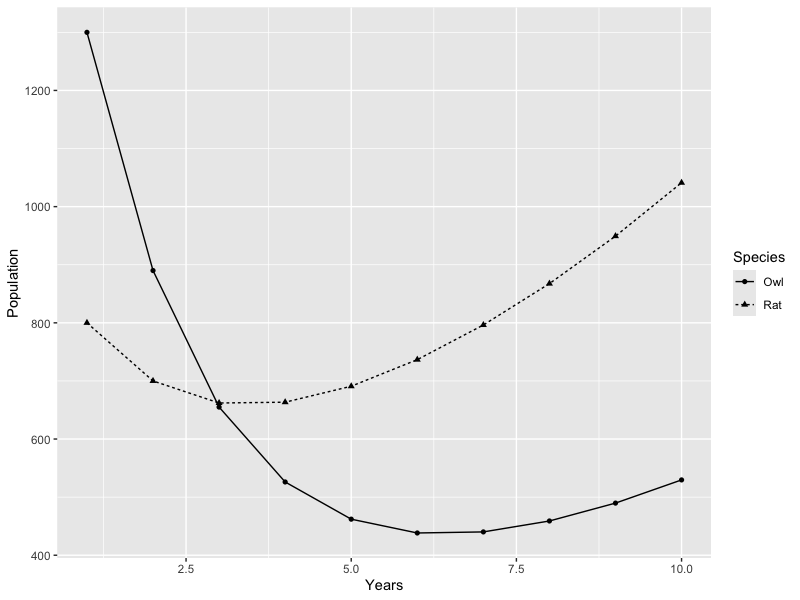

In [ ]:
# Get data for 10 years
n_years <- 10
data <- population_model(n_years, 2000, 1000)

# Reshape data
years <- rep(data$Years, 2)
population <- c(data$Owls, data$Rats)
species <- c(rep("Owl", n_years), rep("Rat", n_years))
data_melted <- data.frame(Years=years, Population=population, Species=species)

# Plot
ggplot(data=data_melted, aes(x=Years, y=Population, group=Species)) +
  geom_line(aes(linetype=Species)) +
  geom_point(aes(shape=Species))